In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
f1=pd.read_csv("./files/sales1.csv")
f1.head()

,Sales,Advertising
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [4]:
df=pd.DataFrame(f1)

In [5]:
df.shape

(36, 2)

In [6]:
df.describe()

,Sales,Advertising
count,36.000000,36.000000
mean,24.255556,28.527778
std,6.185118,18.777625
min,12.000000,1.000000
25%,20.300000,15.750000
50%,24.250000,23.000000
75%,28.600000,41.000000
max,36.500000,65.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0       Sales    36 non-null     float64
 1   Advertising  36 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [9]:
x=df["    Sales"].values
y=df["Advertising"].values

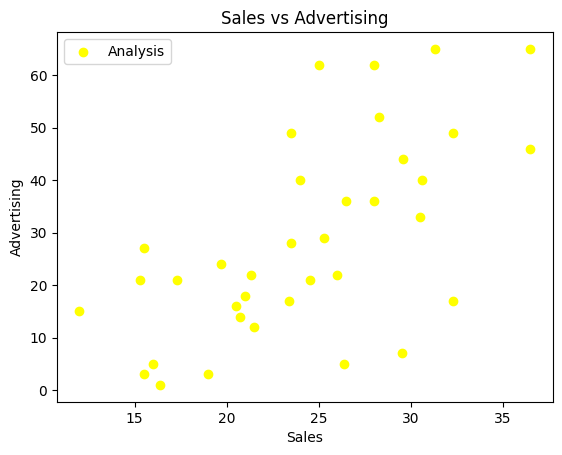

In [11]:
plt.scatter(x,y,label='Analysis',color="yellow")
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend()
plt.title('Sales vs Advertising')
plt.show()

In [12]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [14]:
x_train.shape,x_test.shape

((24, 1), (12, 1))

In [15]:
y_train.shape,x_test.shape

((24, 1), (12, 1))

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm=LinearRegression()

In [18]:
lm.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = lm.predict(x_test)

In [20]:
a = lm.coef_
b = lm.intercept_
a,b

(array([[1.60509347]]), array([-11.16003616]))

In [21]:
lm.predict(x)[0:5]

array([[ 8.10108551],
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [24]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE value: {:.4f}".format(mse))
print("RMSE value: {:.4f}".format(rmse))
print("r2_score value: {:.4f}".format(r2_score(y_test,y_pred)))

MSE value: 126.0514
RMSE value: 11.2273
r2_score value: 0.5789


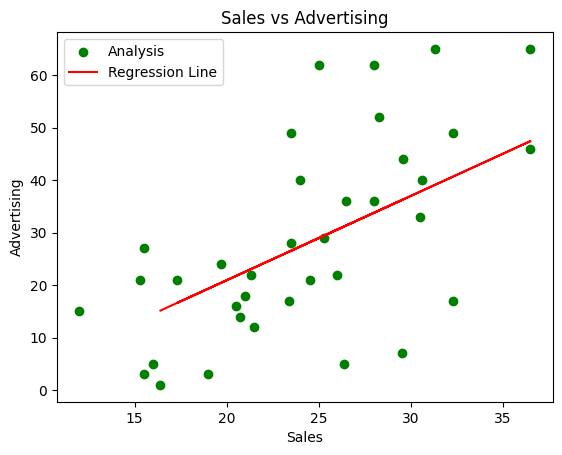

In [26]:
plt.scatter(x,y,label='Analysis',color="green")
plt.plot(x_test,y_pred,color='r',label='Regression Line')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend()
plt.title('Sales vs Advertising')
plt.show()

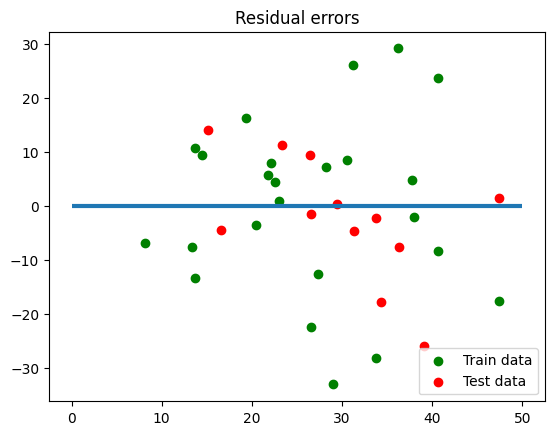

In [28]:
plt.scatter(lm.predict(x_train),lm.predict(x_train)-y_train,label="Train data",color="green")
plt.scatter(lm.predict(x_test),lm.predict(x_test)-y_test,label="Test data",color="red")
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title("Residual errors")
plt.legend(loc = 4)
plt.show()

In [30]:
y_pred1=lm.predict(x_train)
print("r2_score value: {:.4f}".format(r2_score(y_train,y_pred1)))

r2_score value: 0.2861


In [32]:
print("Training score : {:.4f}".format(lm.score(x_train,y_train)))
print("Test score : {:.4f}".format(lm.score(x_test,y_test)))

Training score : 0.2861
Test score : 0.5789
